### Notebook by [Volkan Sonmez](http://www.pythonicfool.com/)  
### Ambient Temperature Dataset Analysis with Python Libraries and Application of Kmeans ++, ADTK.
####  https://github.com/volkansonmez/Exploratory_Data_Analysis_and_ML_Projects


## Table of contents

1. [Introduction](#Introduction)

2. [License](#License)

3. [EDA and Building ML Model](#EDA_and_Building_ML_Model)

4. [Conclusion](#Conclusion)

## Introduction

[[ go back to the top ]](#Table-of-contents)

Ambient Temperature Dataset (in Anomaly Detection Dataset Folder) is analyzed with Pandas, Seaborn, and Matplot Libraries. Kmeans++ algorithm is written from scratch for clustering the data for further analysis. Finally, basic adtk tool is used to view the anomalities.
The dataset can be obtained at: https://www.kaggle.com/boltzmannbrain/nab This is a timeseries dataset showing hourly temperature values for one year.


## License

[[ go back to the top ]](#Table-of-contents)

Please see the [repository README file](https://github.com/volkansonmez/Exploratory_Data_Analysis_and_ML_Projects) 
for the licenses and usage terms for the instructional material and code in this notebook. 

## EDA_and_Building_ML_Model

[[ go back to the top ]](#Table-of-contents)

Instructions: Do a time series data analysis with Matplotlib, Seaborn and Pandas and then apply Kmeans++ to see how many clusters this dataset can fit for an optimum separation. Use adtk tools to do anomaly detection on the data. 

Note: Save this dataset to the same working folder of your notebook as: "ambient_temperature_system_failure.csv" 

In [35]:
# Import necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
# Import the csv file into a dataframe with pandas library

df = pd.read_csv("ambient_temperature_system_failure.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7267 non-null   object 
 1   value      7267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.7+ KB
None


In [3]:
# View a part of the time series in pandas time series dataframe format

print(df.head(10)) # view the first few instances of the data, the data is made for a value for each hour 
# convert the data type from object to time series
# print(df['timestamp'].dtype) # data type of the values under timestamp attribute is object
df['date'] = pd.to_datetime(df['timestamp']) # converting the timestamp object to pd time series
print(type(df['date'])) # time series
df_timeseries = df.copy() # to be used later

             timestamp      value
0  2013-07-04 00:00:00  69.880835
1  2013-07-04 01:00:00  71.220227
2  2013-07-04 02:00:00  70.877805
3  2013-07-04 03:00:00  68.959400
4  2013-07-04 04:00:00  69.283551
5  2013-07-04 05:00:00  70.060966
6  2013-07-04 06:00:00  69.279765
7  2013-07-04 07:00:00  69.369608
8  2013-07-04 08:00:00  69.166714
9  2013-07-04 09:00:00  68.986083
<class 'pandas.core.series.Series'>


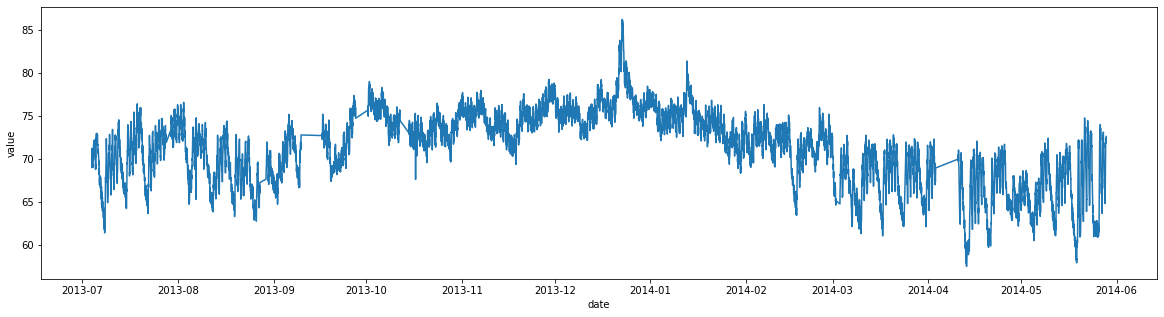

In [4]:
# View the time series dataframe with matplotlib

plt.figure(figsize=(20,5))
sns.lineplot(x = df['date'], y = df['value']) # view the whole dataset in one chart

In [5]:
# See if there are missing values within the dataframe for each instance (dataframe might still missing some days)

df_timeseries.isna().sum()
# As it is seen: there are no missing values, however there are some missing instances forming unusual patterns 
# such as 2013's 09-10 th months or 2014's 4th month etc.

timestamp    0
value        0
date         0
dtype: int64

4.247217158777425 71.24243270828815
99


(array([55., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.]),
 array([57.45840559, 60.33488629, 63.21136699, 66.0878477 , 68.9643284 ,
        71.8408091 , 74.7172898 , 77.5937705 , 80.47025121, 83.34673191,
        86.22321261]),
 <a list of 10 Patch objects>)

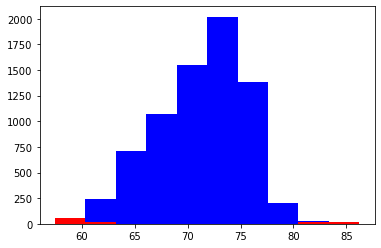

In [6]:
# WITHOUT considering the normal changes in season, weekdays, weekends, holidays, or the time of the day: day/night,
# one easy way to visualize abnormality is to assume that the data fits into a gaussian. Whatever the data is far
# from the mean is considered abnormality. This is only a valid approach if the data has a gaussian-like distribution.

values = np.array(df['value'])
plt.hist(values, color = 'b')
std = values.std()
mean = values.mean()

# Anomaly could be 1, 2, or 3 times of std deviation or a constant*variance away from the mean, depending on the data.
print(std, mean)
values_above_and_below_normal = [i for i in values if i < mean-2.5*std or i > mean+2.5*std] # made for +- 2.5 std 
print(len(values_above_and_below_normal))
plt.hist(values_above_and_below_normal, color = 'r')

# The abnormalities which is when the temperature is too cold and too hot are shown below in red color
# The data is not a very good gaussian distribution. 

# Conclusion: Data needs to be analyzed after it is expanded to multiple attributes. Reminder: There are 7267 entries. 

In [28]:
# Visualize the data after breaking it into several categories with .dt.strftime() function;
# Ex: '%B %d, %Y, %r' ==> %B:April %d:10, %Y:2019, %r:09:00:00 AM ==> 'April 10, 2019, 09:00:00 AM'

df['month'] = df['date'].dt.strftime('%B')  # %B is month
df['year'] = df['date'].dt.strftime('%Y')   # %Y is year
df['dayofweek'] = df['date'].dt.strftime('%A') # A is day of the week
df['quarter'] = df['date'].dt.quarter 
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.dayofweek
df['weekofyear'] = df['date'].dt.isocalendar().week

# For later use, store data and labels
X = df.drop(['value', 'date' , 'timestamp'], axis = 1)
y = df['value']
df_new = pd.concat([X, y], axis=1)

# View if data and labels are ready to analyze
df_new.head()

,month,year,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,hour,day,weekend,daylight,value
0,July,2013,Thursday,3,185,3,27,0,3,0.0,0.0,69.880835
1,July,2013,Thursday,3,185,3,27,1,3,0.0,0.0,71.220227
2,July,2013,Thursday,3,185,3,27,2,3,0.0,0.0,70.877805
3,July,2013,Thursday,3,185,3,27,3,3,0.0,0.0,68.959400
4,July,2013,Thursday,3,185,3,27,4,3,0.0,0.0,69.283551


In [29]:
# Check if there is any none values exist in the data

df_new.isna().sum()

month         0
year          0
dayofweek     0
quarter       0
dayofyear     0
dayofmonth    0
weekofyear    0
hour          0
day           0
weekend       0
daylight      0
value         0
dtype: int64

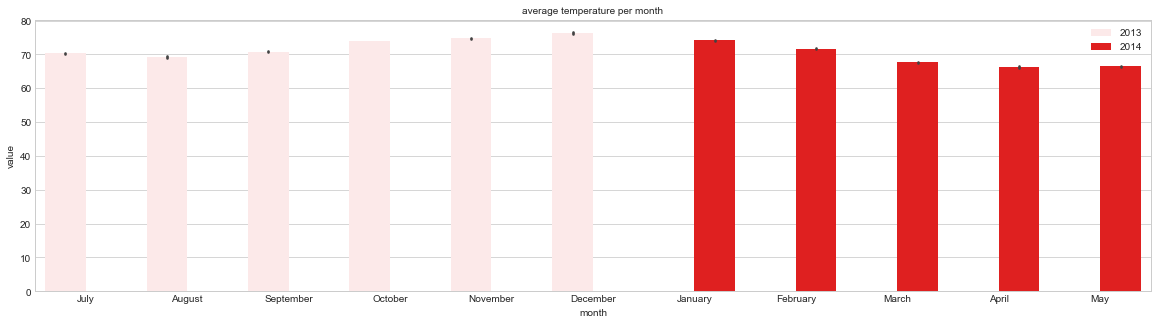

In [34]:
# Visualize the data by month & year and mean temperature value

plt.figure(figsize=(20,5))
a = sns.barplot(x="month", y="value", hue = 'year', color = 'red' , data = df_new)
a.set_title("average temperature per month", fontsize=10)
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Average Temperature by Weekday')

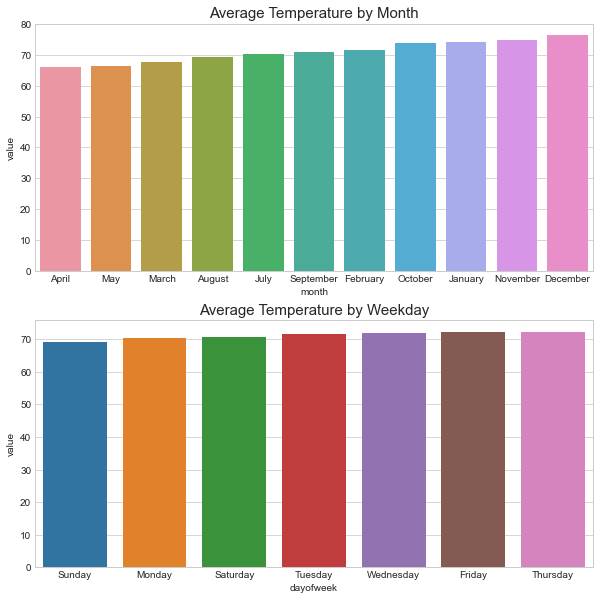

In [33]:
# Visualize the data just by month and weekdays vs mean temperature value

fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(10,10)

temp_per_month = pd.DataFrame(df_new.groupby("month")["value"].mean()).reset_index().sort_values('value')
sns.barplot(data=temp_per_month,x="month",y="value",ax=ax1)
ax1.set_title("Average Temperature by Month",fontsize=15)

temp_per_weekday = pd.DataFrame(df_new.groupby("dayofweek")["value"].mean()).reset_index().sort_values('value')
sns.barplot(data=temp_per_weekday,x="dayofweek",y="value",ax=ax2)
ax2.set_title("Average Temperature by Weekday",fontsize=15)


In [11]:
# Conclusion: The data does not show any good separation or a base for a clustering algorithms so far
# Next: Do day time vs night time, weekday vs weekend comparisions and may be hourly comparisions.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   7267 non-null   object        
 1   value       7267 non-null   float64       
 2   date        7267 non-null   datetime64[ns]
 3   month       7267 non-null   object        
 4   year        7267 non-null   object        
 5   dayofweek   7267 non-null   object        
 6   quarter     7267 non-null   int64         
 7   dayofyear   7267 non-null   int64         
 8   dayofmonth  7267 non-null   int64         
 9   weekofyear  7267 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 546.6+ KB


In [12]:
# Create a brand new df with the new attributes

df['dayofyear'] = df['date'].dt.dayofyear 
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.dayofweek.astype(int)
df['weekend'] = (df['day'] > 5).astype(int)*0.001
df['daylight'] = ((df['hour'] >= 7) & (df['hour'] <= 18)).astype(int)*0.001
df_week_and_day = df[['dayofyear', 'day', 'daylight','weekend', 'value']]
df_week_and_day.info()
df_week_and_day.head(10)
# we are adding a very very small bias and converting the text values into float to do a clustering. 
# the daylight is assumed to have higher temp as well as the weekends

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dayofyear  7267 non-null   int64  
 1   day        7267 non-null   int64  
 2   daylight   7267 non-null   float64
 3   weekend    7267 non-null   float64
 4   value      7267 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 284.0 KB


,dayofyear,day,daylight,weekend,value
0,185,3,0.000,0.0,69.880835
1,185,3,0.000,0.0,71.220227
2,185,3,0.000,0.0,70.877805
3,185,3,0.000,0.0,68.959400
4,185,3,0.000,0.0,69.283551
5,185,3,0.000,0.0,70.060966
6,185,3,0.000,0.0,69.279765
7,185,3,0.001,0.0,69.369608
8,185,3,0.001,0.0,69.166714
9,185,3,0.001,0.0,68.986083


In [13]:
# According to the earlier EDA figures we can assume that:
# 'dayoftheyear' would offer no good input since it has 0 to 365 the values has no correlation with temperature change  
# 'day' is an atrribute with 7 scalar values which would bring a huge bias and to this analysis if used. 
# 'weekend' itself is not looking like a separator but for the sake of separation/clustering let's use it. 
# 'daylight' was worth taking a look with with the EDA but again just for clustering, it might work. 

[     0.    131088.352  42308.813  21904.349  14003.767   9940.356
   7395.793   5556.248   4246.255   3388.203   2702.44    2321.026
   1962.395   1651.473   1441.012]


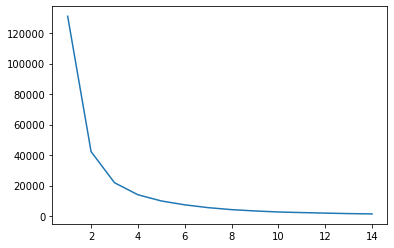

In [14]:
# It looks like 'daylight','weekend','value' attributes can be clustured for this data with Kmeans.
# Write a kmeans++ algorithm from scratch and initialize the centroids based on a probability index set by their 
# distance from each other


dataset = np.array(df_week_and_day[['daylight','weekend','value']]) # Dataset is a numpy array and k is # of centroids
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline


def kmeans_plus_plus(dataset, k):
    # define the shape of the dataset
    N, D = dataset.shape
    # define the centroid size
    C = np.zeros([k, D])
    # pick a random instance in the dataset
    random_index = np.random.choice(len(dataset))
    # choose a random instance
    random_instance = dataset[random_index]
    for i in range(k):
        # define the distance array to store all items in the dataset from the randomly chosen instance
        distance_array = np.linalg.norm(random_instance - dataset , axis = 1)
        # each distance proportionally increase the chances for the next data to be chosen
        prob_array = distance_array / np.sum(distance_array)
        # based on the distances, chose a random instance index
        chosen_index = np.random.choice(len(dataset) , p = prob_array)
        # assign the next instance to the centroid[i]
        C[i] = dataset[chosen_index]
        # last chosen C[i] will be the new reference to choose the next instance for C[i+1]
        random_instance = C[i]  
    return C



def k_means(dataset, k): # return the WCSS value for chosen k clusters
    # initialize the Within Cluster Sum of Squares value to 0
    WCSS = 0
    # create an array to collect the indices of the groups
    final_array = np.zeros(len(dataset))
    # initialize the centroids based on the kmeansplusplus function. If data is too big, just choose k random instances
    C = kmeans_plus_plus(dataset, k)
    # create an old C initialized with zeros
    C_old = np.zeros(C.shape)
    # define the error function
    parameter_gradient = np.linalg.norm(C-C_old)
    # count the number of epochs performed until the error is zero, put an iterator
    epoch = 0
    # continue to assign new C until the distance btw C_new and C_old is very small
    while parameter_gradient > 1e-4: # it is the distance between C old and C new
        # loop over the dataset to measure the instance distances with C
        # assign the group number for each instance based on the shortest distance from the instance to the C
        for i in range(len(dataset)):
            distance = np.linalg.norm((dataset[i] - C), axis = 1) # axis 1 will output distance array with size k
            centroid_index = np.argmin(distance) # the closest centroid_index from the instance 
            final_array[i] = centroid_index # assign the centroid index as group number to an array 
        # assign the current C as C_old to update the new C
        C_old = np.copy(C)
        # loop over each index of the centroid
        for i in range(k):
            # list of items with the same group numbers are assigned to sub_groups
            sub_group = [dataset[j] for j in range(len(dataset)) if final_array[j] == i]
            # take the mean of the sub-group 
            mean_of_sub_group = np.mean(sub_group, axis = 0)
            # assign the mean of the sub-group to new C
            C[i] = mean_of_sub_group
        # update the parameter gradient after assigning the new C    
        parameter_gradient = np.linalg.norm(C - C_old) # when C does not change, we reach to zero error 
        # update epoch value
        epoch += 1

    # To measure WCSS, sum up the square of the "distances from all group data to their mean"
    for j in range(k):
        grouped_data = [dataset[i] for i in range(len(dataset)) if final_array[i] == j]
        mean_of_grouped_data = np.mean(grouped_data, axis = 0) # outputs number of attributes
        for i in range(len(grouped_data)):
            WCSS += np.sum((grouped_data[i] - mean_of_grouped_data)**2)  
            
    
    # return the final cluster coordinates, the array carrying indices of all data points, and the WCSS with given k
    return epoch, C, final_array, WCSS


# if normalization was needed for the dataset before clustering, we could have used:
# dataset = dataset/np.linalg.norm(dataset, ord=2, axis=1, keepdims=True) 
# fix a random seed for picking the centroids
np.random.seed(1)
k = 15
def run_k_means():
    WCSS_list = np.zeros(k)
    for i in range(1, k):
        epoch, C, final_array, WCSS = k_means(dataset, i)
        WCSS_list[i] = WCSS

    return WCSS_list

result = run_k_means()
print(result)
plt.plot(np.arange(1, k), result[1:])
    

In [15]:
# 3 clusters for this data seems like a good separation

epoch, C, final_array, WCSS = k_means(dataset, 3)
# final_array can be arranged in 3 clusters
for j in range(3):
    first_cluster = np.array([dataset[i] for i in range(len(dataset)) if final_array[i] == 0])
    second_cluster = np.array([dataset[i] for i in range(len(dataset)) if final_array[i] == 1])
    third_cluster = np.array([dataset[i] for i in range(len(dataset)) if final_array[i] == 2])
    

70.86149441358569 75.38348706130851 65.09699959218446
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2906 non-null   float64
 1   1       2906 non-null   float64
 2   2       2906 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB
          1     2
0                
0.000  1301  1301
0.001  1605  1605
          0     2
1                
0.000  2660  2660
0.001   246   246
          1     2
0                
0.000  1466  1466
0.001  1247  1247
          0     2
1                
0.000  2437  2437
0.001   276   276
         1    2
0              
0.000  870  870
0.001  778  778
          0     2
1                
0.000  1178  1178
0.001   470   470


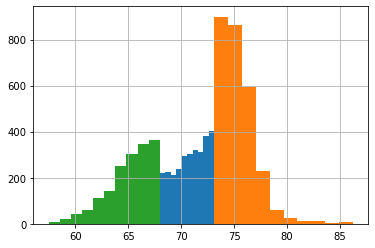

In [16]:
# Find out the differences of the clusters, there is a slight difference of these clusters mean values
# categorize the first 3 index into a value

print(first_cluster[:,2].mean(), second_cluster[:,2].mean(), third_cluster[:,2].mean())

df1 = pd.DataFrame(first_cluster)
df2 = pd.DataFrame(second_cluster)
df3 = pd.DataFrame(third_cluster)
df1.info()

print(df1.groupby([0]).count())
print(df1.groupby([1]).count())
print(df2.groupby([0]).count())
print(df2.groupby([1]).count())
print(df3.groupby([0]).count())
print(df3.groupby([1]).count())

# as it is seen grouping by day or night (column 0) is not as effective as grouping by weekend vs weekday (column 1)
# it means that when we group the data by daylight or night we do have close numbers of weekday and weekends 
# but when we group the data weekday or weekend, we have a good separation for daylight. 
df1[2].hist()
df2[2].hist()
df3[2].hist()

In [17]:
# This is the end of clustering method by Kmeans and visualization of these clusters. 
# Depending on the expectations, the first cluster's extreme lows and the third cluster's extreme highs seems abnormal
# The data is gaussian like and it doesn't really separate the extremes well by clusturing.

timestamp
2013-07-04 00:00:00    69.880835
2013-07-04 01:00:00    71.220227
2013-07-04 02:00:00    70.877805
2013-07-04 03:00:00    68.959400
2013-07-04 04:00:00    69.283551
Name: value, dtype: float64


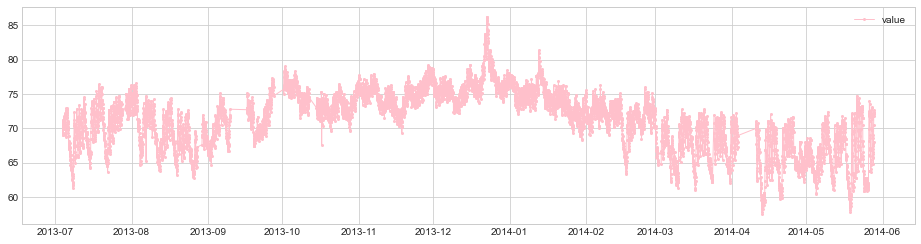

In [18]:
# Here is a much simpler approach for this kind of a dataset:

import adtk
from adtk.data import validate_series
from adtk.visualization import plot
df_timeseries = pd.read_csv('ambient_temperature_system_failure.csv', index_col="timestamp", parse_dates=True, squeeze=True)
s = validate_series(df_timeseries)
plot(s, ts_linewidth=1, ts_markersize=4, ts_color = 'pink')
print(df_timeseries.head())

/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


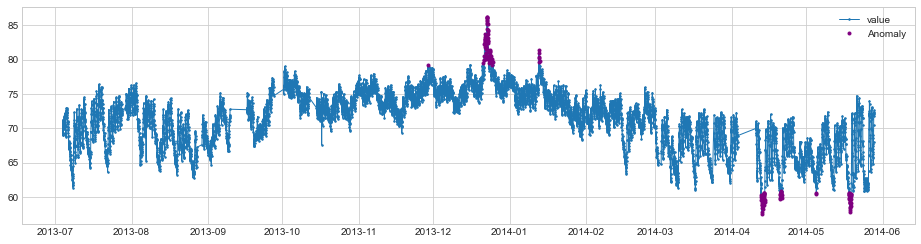

In [19]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.99, low=0.01) # see the 1 percent extremities 
anomalies = quantile_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=3, anomaly_color='purple', anomaly_tag="marker")

# Conclusion:
# If we only assume the top 1 percent extreme as anomality. We can say that anything over 80 and below 60 is extreme. 

## Conclusion

[[ go back to the top ]](#Table-of-contents)

Since the data has some missing instances, it is hard to continue with adtk tools to slide some windows across the data for further analysis.

The easiest way to detect the anomaly was basically looking at the top and bottom extremes of the data values assuming this data fits into a gaussian. For this problem, if we only assume the top 1 percent extreme as anomality, we can say that anything over 80 and below 60 degrees can be categorized extreme. 

Kmeans algorithm was not going to reveal a good clustering but it was still implimented to show that not every algorithm is a good approach for every problem. How do we know this? The temperature change data is a gaussian like distribution and extreme values were not clustered. The 3 clusters seen in the histogram were almost evenly cut.  

EDA shows that the values do not change much in any regular behavior in any category such as it is not so high on Friday nights or so low on the weekends or very high or low on some particular months etc.. The extremes are around the ~1% of the cold and the hot months.